In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [3]:
pwd

'C:\\Users\\tashi\\Documents\\Untitled Folder'

In [4]:
#read in data

df = pd.read_csv('C:/Users/tashi/Documents/Untitled Folder/Reviews.csv')

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
df = df.head(500)
print(df.shape)

(500, 10)


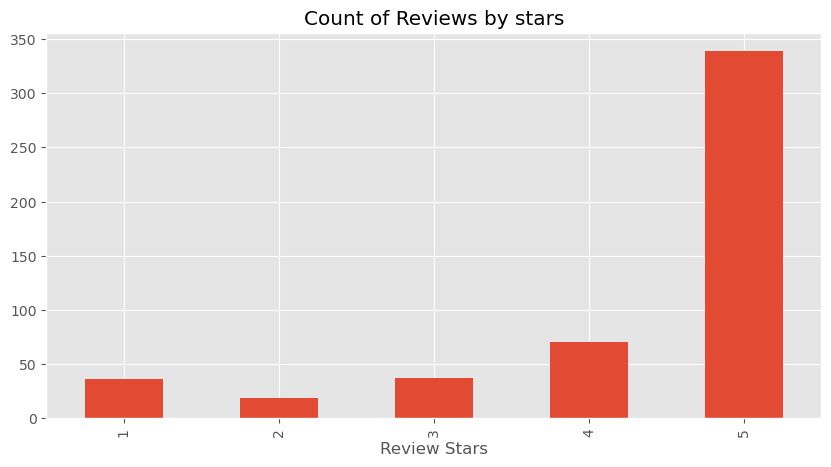

In [8]:
##Quick EDA

ax = df['Score'].value_counts().sort_index() \
     .plot(kind='bar', 
           title='Count of Reviews by stars', 
           figsize=(10, 5))

ax.set_xlabel('Review Stars')
plt.show()

In [9]:
## basic nltk 

example = df['Text'][50]
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [12]:
nltk.pos_tag(tokens)  #pos_tag shows part of speech for each of the tokens

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [14]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tashi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
entities = nltk.chunk.ne_chunk(tagged)     #identifies and classifies named entities
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tashi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
#STEP 1 VADER SENTIMENT SCORING
#This uses a "bag of words" approach:
#Stop words are removed and each word is scored and comnined to a total score

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [18]:
sia.polarity_scores('I am so angry!')

{'neg': 0.66, 'neu': 0.34, 'pos': 0.0, 'compound': -0.5974}

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
#Run the polarity score on entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 900.15it/s]


In [21]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [22]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [23]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [24]:
vaders       #now we have sentiment scores and metadata together

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

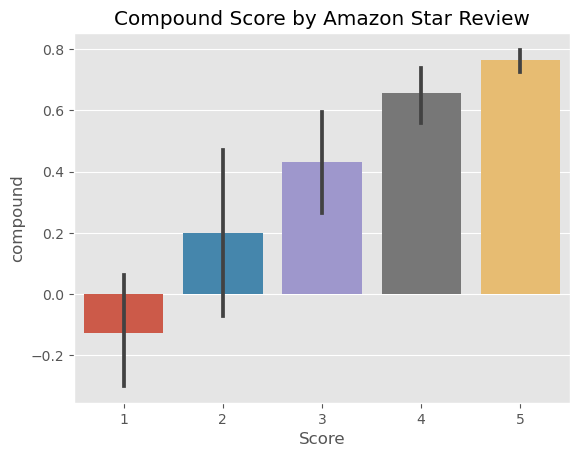

In [25]:
#PLOTTING VADERS RESULTS
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')

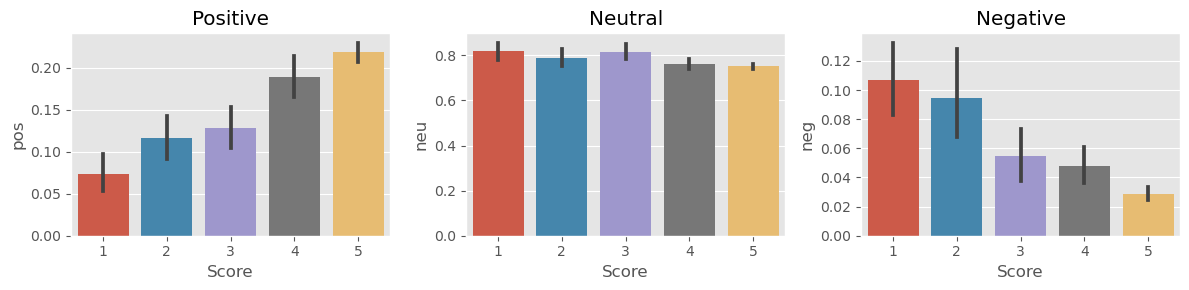

In [26]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [67]:
AI_data = pd.read_csv('C:/Users/tashi/Documents/Untitled Folder/AI.csv')

In [68]:
AI_data.head()

,Unnamed: 0,Unnamed: 1,Name,Profile ID,Date,Likes,Stars,Comment,URL,Profile Image
0,1,NaN,Sue Almeida,ID: 100001225208902,23-05-2023 09:26,25,NaN,this is very bad,https://www.exportcomments.com/done/230144c5-b...,https://scontent-sof1-2.xx.fbcdn.net/v/t1.1816...
1,2,NaN,Norman Burns,ID: 1627881824,23-05-2023 09:27,12,NaN,we are going to die by robots,https://www.exportcomments.com/done/230144c5-b...,https://scontent-sof1-2.xx.fbcdn.net/v/t39.308...
2,3,NaN,Marco Serracca,ID: 1589180494,23-05-2023 09:28,0,NaN,Visto i disastri che l'esistenza umana ha crea...,https://www.exportcomments.com/done/230144c5-b...,https://scontent-sof1-2.xx.fbcdn.net/v/t31.181...
3,4,NaN,Nenad Miljković,ID: 100002919737462,23-05-2023 09:29,1,NaN,On je isto robot . Njemu je svejedno što ljubi...,https://www.exportcomments.com/done/230144c5-b...,https://scontent-sof1-1.xx.fbcdn.net/v/t39.308...
4,5,NaN,Md Shahin Mia,ID: 100006002678466,23-05-2023 09:30,31,NaN,Very creative prompt with artificial intellige...,https://www.exportcomments.com/done/230144c5-b...,https://scontent-sof1-2.xx.fbcdn.net/v/t39.308...


In [73]:
sia.polarity_scores(AI_data['Comment'][0])

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}

In [74]:
AI_data_sentiment_scores = []

for index, row in AI_data.iterrows():
    Comment = row['Comment']
    sentiment_score = sia.polarity_scores(Comment)
    AI_data_sentiment_scores.append(sentiment_score)

In [75]:
AI_data_sentiment_scores

[{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849},
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.5994},
 {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.4003},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.8748},
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4242},
 {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412},
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.6892},
 {'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849},
 {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4927},
 {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.7003},
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404},
 {'neg': 0.212, 'neu': 0.704, 'pos': 0.084, 'compound': -0.68

In [76]:
res1 = pd.DataFrame(AI_data_sentiment_scores)
res1

,neg,neu,pos,compound
0,0.558,0.442,0.000,-0.5849
1,0.394,0.606,0.000,-0.5994
2,0.000,0.848,0.152,0.4003
3,0.000,1.000,0.000,0.0000
4,0.000,0.445,0.555,0.8748
...,...,...,...,...
94,0.000,0.802,0.198,0.6369
95,0.000,0.780,0.220,0.5859
96,0.000,1.000,0.000,0.0000
97,0.000,0.720,0.280,0.7506


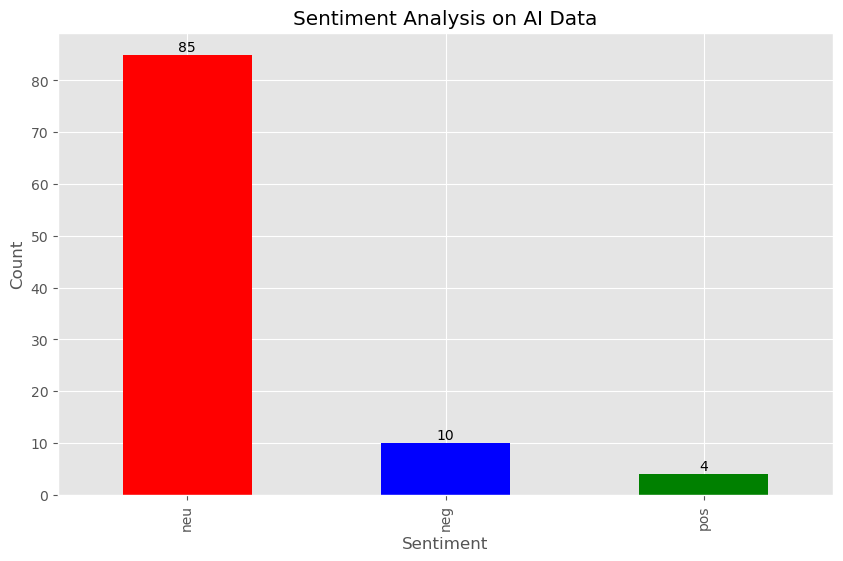

In [77]:
res1_sentiment_counts = res1[['neg','neu','pos']].idxmax(axis=1).value_counts()

# Plotting the bar chart
ax = res1_sentiment_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Sentiment Analysis on AI Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the count values on top of each bar
for i, v in enumerate(res1_sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [34]:
Climate_data = pd.read_csv('C:/Users/tashi/Documents/Untitled Folder/climate_change.csv')

In [35]:
Climate_data_sentiment_scores = []

for index, row in Climate_data.iterrows():
    Comment = row['Comment']
    sentiment_score = sia.polarity_scores(Comment)
    Climate_data_sentiment_scores.append(sentiment_score)

In [36]:
res2 = pd.DataFrame(Climate_data_sentiment_scores)
res2

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.270,0.730,0.4019
2,0.260,0.740,0.000,-0.4871
3,0.242,0.569,0.189,-0.0276
4,0.000,0.610,0.390,0.4927
...,...,...,...,...
94,0.000,1.000,0.000,0.0000
95,0.122,0.762,0.115,-0.3400
96,0.259,0.741,0.000,-0.4215
97,0.000,1.000,0.000,0.0000


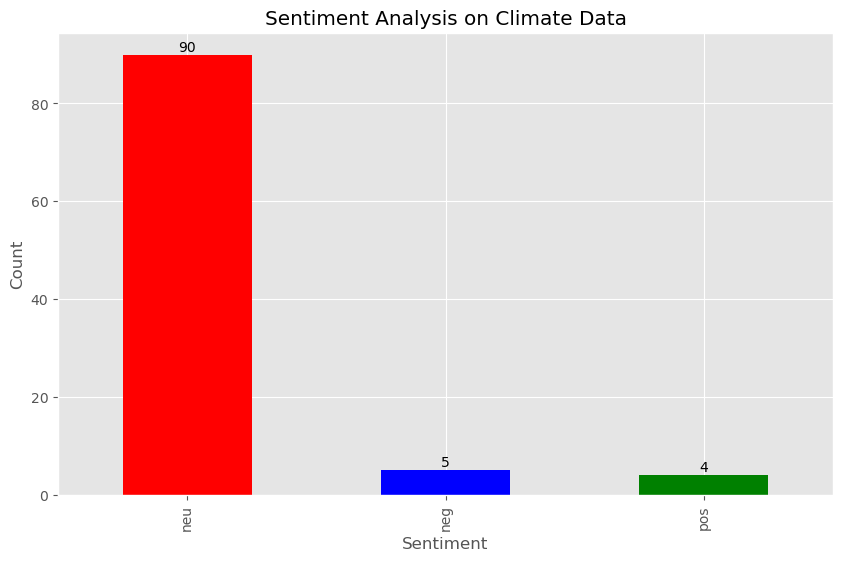

In [37]:
res2_sentiment_counts = res2[['neg','neu','pos']].idxmax(axis=1).value_counts()

# Plotting the bar chart
ax = res2_sentiment_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Sentiment Analysis on Climate Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the count values on top of each bar
for i, v in enumerate(res2_sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [42]:
Iphone_data = pd.read_csv('C:/Users/tashi/Documents/Untitled Folder/iphone_15.csv')

In [43]:
Iphone_data_sentiment_scores = []

for index, row in Iphone_data.iterrows():
    Comment = row['Comment']
    sentiment_score = sia.polarity_scores(Comment)
    Iphone_data_sentiment_scores.append(sentiment_score)

In [44]:
res3 = pd.DataFrame(Iphone_data_sentiment_scores)
res3

,neg,neu,pos,compound
0,0.000,0.500,0.500,0.2500
1,0.000,0.448,0.552,0.5719
2,0.000,0.755,0.245,0.0772
3,0.000,1.000,0.000,0.0000
4,0.000,0.616,0.384,0.7964
...,...,...,...,...
94,0.000,1.000,0.000,0.0000
95,0.000,0.513,0.487,0.6908
96,0.107,0.579,0.314,0.5423
97,0.000,1.000,0.000,0.0000


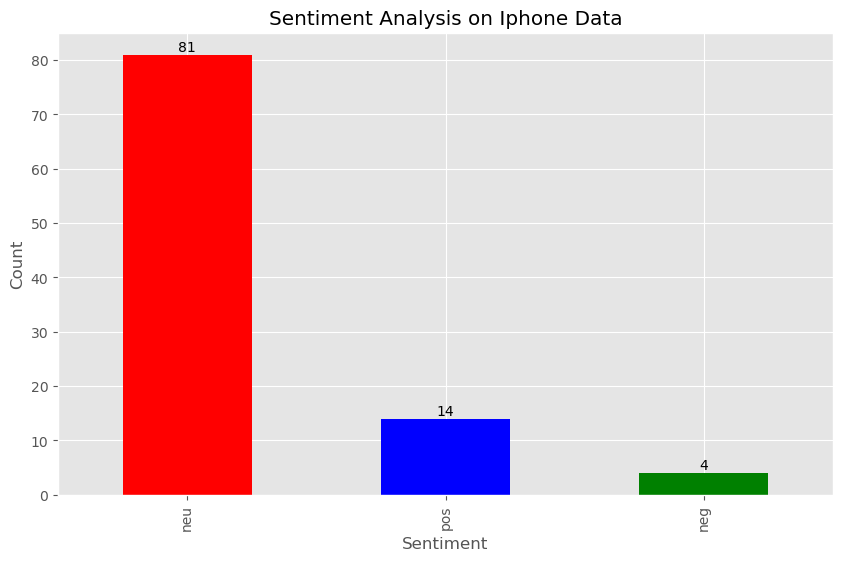

In [60]:
res3_sentiment_counts = res3[['neg','neu','pos']].idxmax(axis=1).value_counts()

# Plotting the bar chart
ax = res3_sentiment_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Sentiment Analysis on Iphone Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the count values on top of each bar
for i, v in enumerate(res3_sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [46]:
movie_data = pd.read_csv('C:/Users/tashi/Documents/Untitled Folder/movie.csv')

In [47]:
movie_data_sentiment_scores = []

for index, row in movie_data.iterrows():
    Comment = row['Comment']
    sentiment_score = sia.polarity_scores(Comment)
    movie_data_sentiment_scores.append(sentiment_score)

In [48]:
res4 = pd.DataFrame(movie_data_sentiment_scores)
res4

,neg,neu,pos,compound
0,0.000,0.323,0.677,0.6360
1,0.000,0.182,0.818,0.6688
2,0.000,0.813,0.187,0.5994
3,0.000,0.471,0.529,0.6696
4,0.000,0.715,0.285,0.6588
...,...,...,...,...
95,0.132,0.660,0.208,0.3612
96,0.000,0.619,0.381,0.5719
97,0.000,0.661,0.339,0.6249
98,0.000,1.000,0.000,0.0000


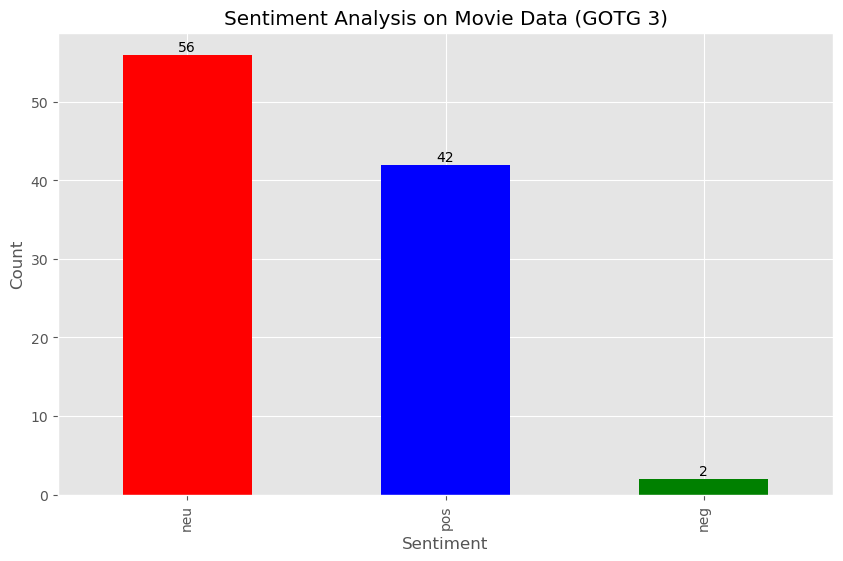

In [49]:
res4_sentiment_counts = res4[['neg','neu','pos']].idxmax(axis=1).value_counts()

# Plotting the bar chart
ax = res4_sentiment_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Sentiment Analysis on Movie Data (GOTG 3)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the count values on top of each bar
for i, v in enumerate(res4_sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [56]:
space_data = pd.read_csv('C:/Users/tashi/Documents/Untitled Folder/space_ISRO.csv')

In [57]:
space_data_sentiment_scores = []

for index, row in space_data.iterrows():
    Comment = row['Comment']
    sentiment_score = sia.polarity_scores(Comment)
    space_data_sentiment_scores.append(sentiment_score)

In [58]:
res5 = pd.DataFrame(space_data_sentiment_scores)
res5

,neg,neu,pos,compound
0,0.0,0.328,0.672,0.6249
1,0.0,1.000,0.000,0.0000
2,0.0,0.606,0.394,0.5994
3,0.0,0.392,0.608,0.4767
4,0.0,1.000,0.000,0.0000
...,...,...,...,...
95,0.0,1.000,0.000,0.0000
96,0.0,1.000,0.000,0.0000
97,0.0,1.000,0.000,0.0000
98,0.0,0.111,0.889,0.8402


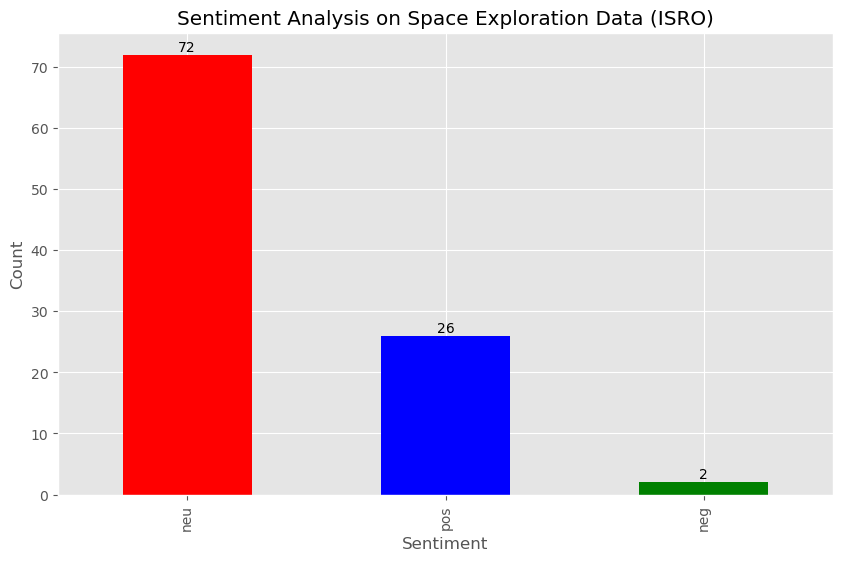

In [59]:
res5_sentiment_counts = res5[['neg','neu','pos']].idxmax(axis=1).value_counts()

# Plotting the bar chart
ax = res5_sentiment_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Sentiment Analysis on Space Exploration Data (ISRO)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the count values on top of each bar
for i, v in enumerate(res5_sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'